In [14]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Judul: Prediksi Penyakit Jantung Menggunakan Metode Random Forest
Identitas Lengkap:

Nama : Dialgi Anaqah  
NIM : A11.2022.14463  
Program Studi :Tehnik Informatika   
Institusi : Universitas Dian Nuswantoro


Ringkasan dan Permasalahan:
Penyakit jantung merupakan salah satu penyebab utama kematian di dunia. Identifikasi dini terhadap kemungkinan seseorang mengidap penyakit jantung sangat penting untuk meningkatkan peluang penyembuhan dan mengurangi risiko komplikasi lebih lanjut. Namun, sulitnya mengenali pola dari data kesehatan yang kompleks membuat prediksi penyakit jantung menjadi tantangan.

Tujuan:
Tujuan dari proyek ini adalah membangun model pembelajaran mesin yang mampu memprediksi penyakit jantung berdasarkan atribut kesehatan pasien. Dengan demikian, dapat membantu praktisi kesehatan dalam mengambil keputusan yang lebih cepat dan akurat.

Model dan Alur Penyelesaian:

Data Loading: Membaca dataset penyakit jantung.
Exploratory Data Analysis (EDA): Analisis data untuk memahami pola, distribusi, dan korelasi antar fitur.
Data Preprocessing: Memisahkan data menjadi fitur dan label, membagi data menjadi set pelatihan dan pengujian, serta melakukan standarisasi fitur.
Modeling: Melatih model menggunakan algoritma Random Forest.
Evaluasi Model: Mengukur kinerja model dengan metrik seperti akurasi, confusion matrix, dan laporan klasifikasi.
Kesimpulan: Menganalisis hasil prediksi dan memberikan rekomendasi untuk pengembangan lebih lanjut.

In [17]:
# 2. Loading Dataset
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

In [18]:
# 3. Dataset Overview
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of the Dataset:\n", data.head())
print("\nDataset Information:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

Dataset Shape: (303, 14)

First 5 Rows of the Dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3

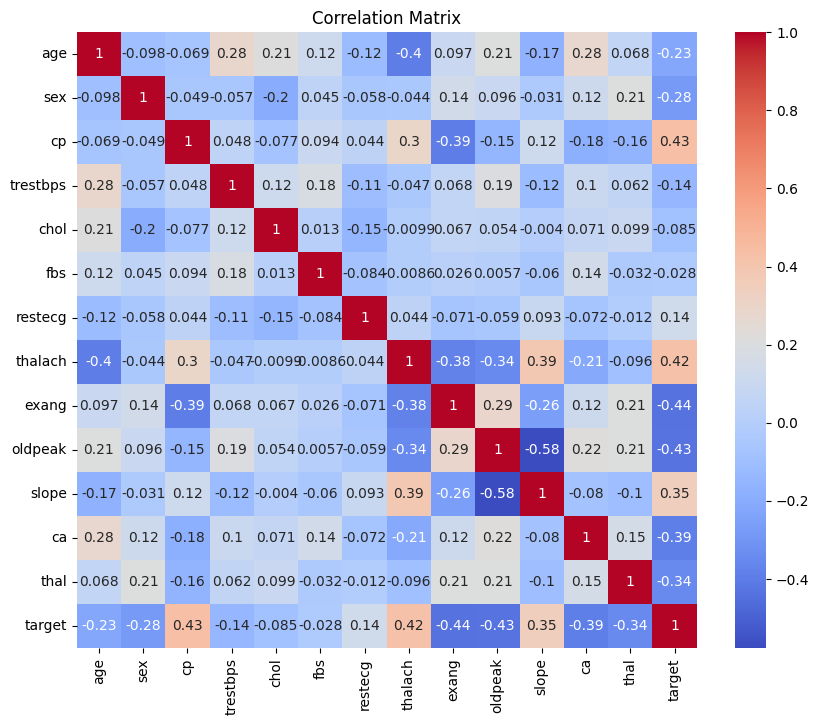

In [19]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

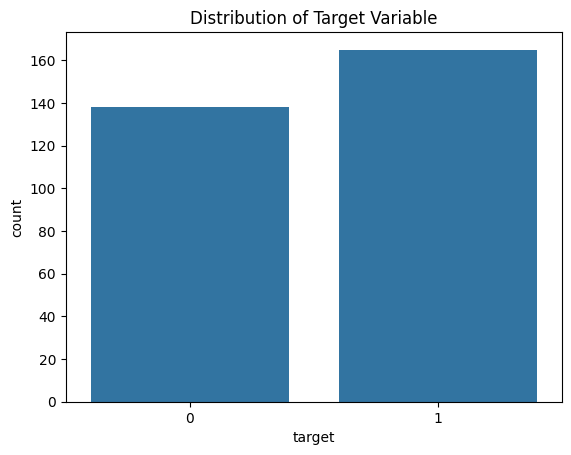

In [20]:
# Distribution of Target Variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


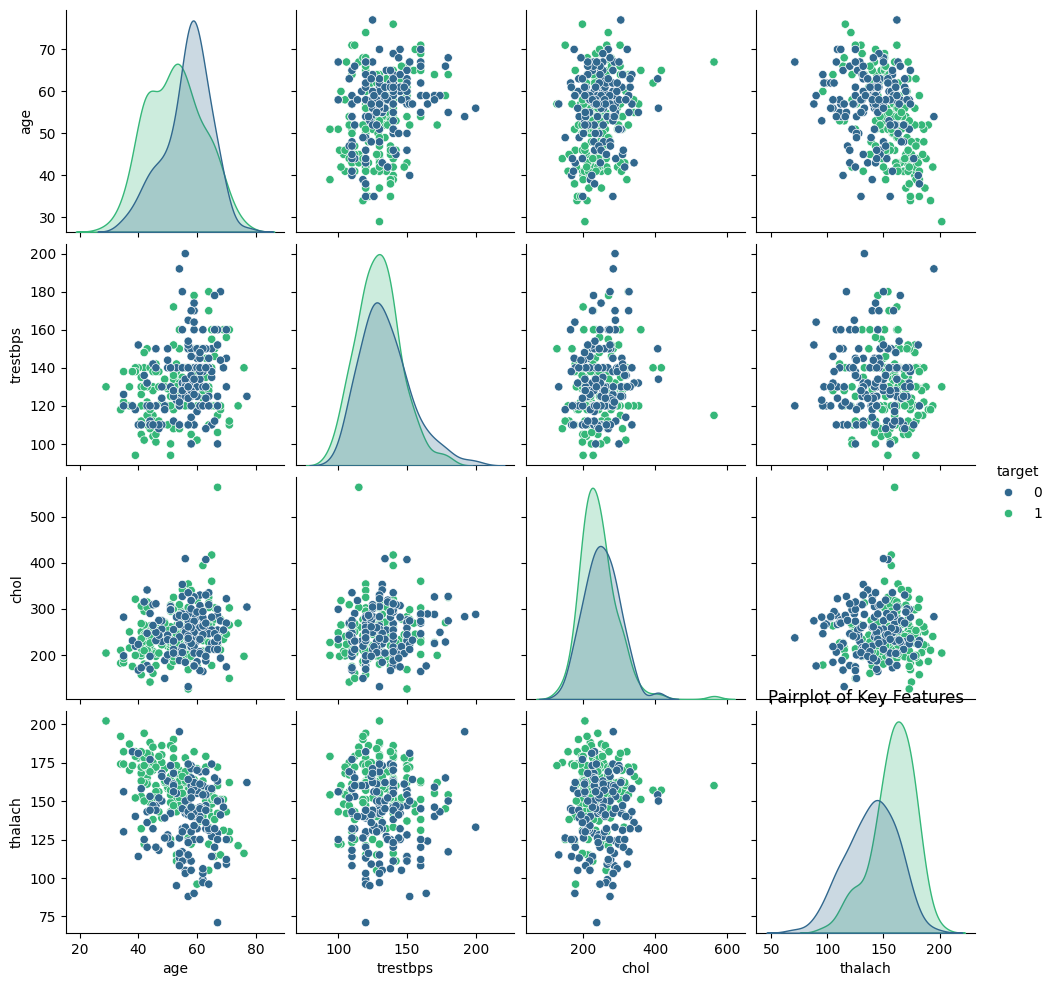

In [27]:
# Pairplot of Key Features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(data[key_features], hue='target', palette='viridis')
plt.title('Pairplot of Key Features')
plt.show()

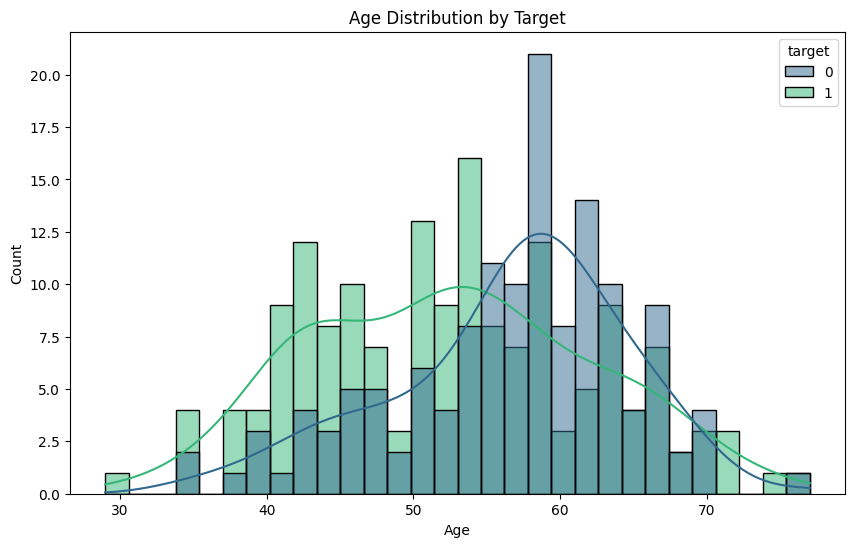

In [28]:
# Age Distribution by Target
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', kde=True, palette='viridis', bins=30)
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-29-f025883f2ac0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=data, palette='viridis')


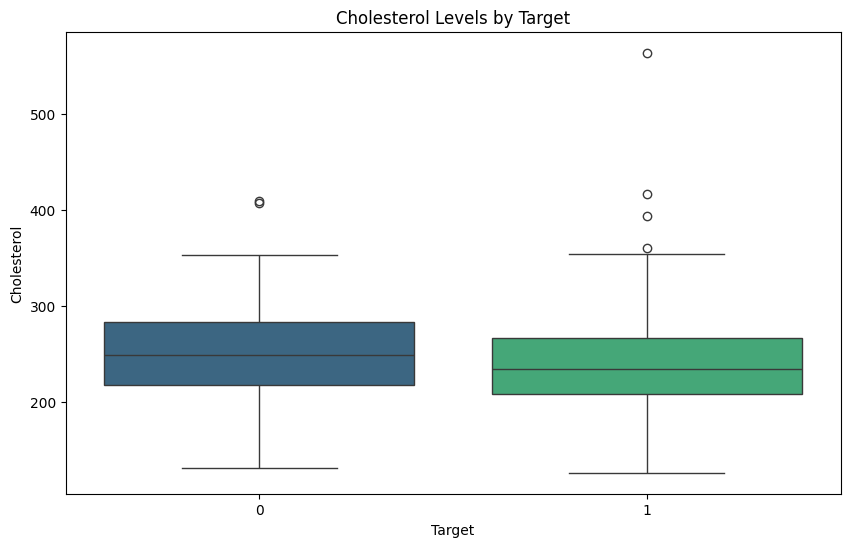

In [29]:
# Cholesterol Levels by Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data, palette='viridis')
plt.title('Cholesterol Levels by Target')
plt.xlabel('Target')
plt.ylabel('Cholesterol')
plt.show()

In [21]:
# 5. Data Preprocessing
X = data.drop('target', axis=1)
y = data['target']

In [22]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# 6. Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# 7. Model Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[24  5]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Accuracy Score: 0.8360655737704918


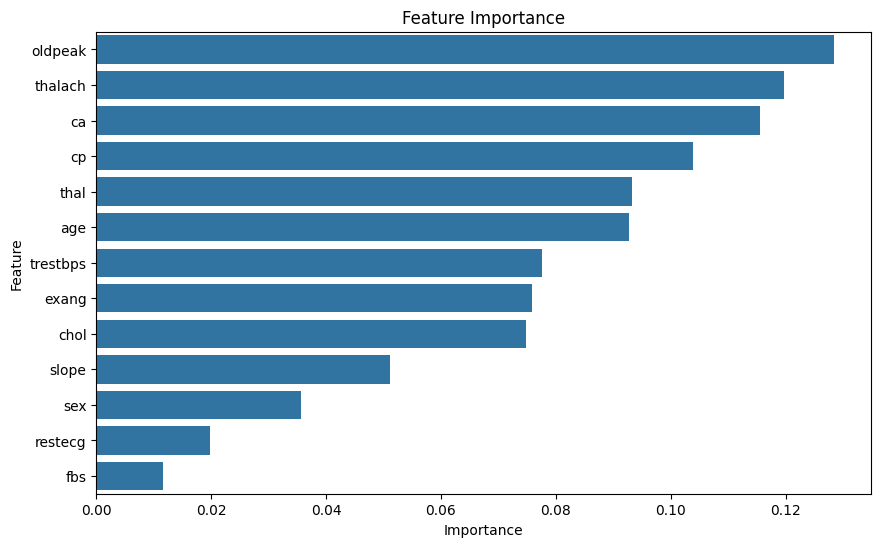

In [26]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

1. Feature Importance:
Fitur oldpeak memiliki pengaruh terbesar terhadap prediksi penyakit jantung, diikuti oleh thalach, ca, dan cp.
Fitur seperti fbs dan restecg memiliki pengaruh paling kecil terhadap model prediksi.
2. Confusion Matrix dan Classification Report:
Model memiliki akurasi 83.6%, dengan nilai precision, recall, dan F1-score rata-rata yang cukup baik (sekitar 0.84).
Model berhasil memprediksi data dengan kesalahan minimal, namun masih terdapat 5 kesalahan pada masing-masing kelas.
3. Analisis Kolesterol Berdasarkan Target:
Tidak terdapat perbedaan signifikan dalam distribusi kadar kolesterol antara pasien dengan atau tanpa penyakit jantung.
Namun, terdapat outlier kolesterol pada kedua kelompok.
4. Distribusi Umur Berdasarkan Target:
Pasien dengan penyakit jantung cenderung berada dalam rentang usia 50-60 tahun.
Pasien tanpa penyakit jantung juga memiliki distribusi usia yang serupa, tetapi lebih menyebar di berbagai kelompok umur.
5. Pairplot Analisis Fitur:
Beberapa fitur menunjukkan hubungan yang menarik dengan target, seperti hubungan antara thalach (denyut jantung maksimum) dan target.
Data memiliki pola yang cukup bervariasi, tetapi ada beberapa korelasi yang dapat dieksplorasi lebih lanjut.


Kesimpulan:
Model menunjukkan performa yang baik dalam memprediksi kemungkinan penyakit jantung. Fitur seperti oldpeak, thalach, dan ca sangat penting dalam proses prediksi, sehingga perlu diperhatikan dalam pengambilan keputusan medis. Dari sisi distribusi data, usia dan kadar kolesterol tidak selalu menjadi faktor penentu yang signifikan, tetapi tetap memberikan kontribusi dalam analisis keseluruhan.